In [13]:
import os
import json

from PIL import Image


for filename in os.listdir("./data/markup"):
    file_box=filename.split('/')[-1].split('.')[0]
    print(file_box)

    with open('./data/markup/'+file_box+'.json', 'r') as f:
        data = json.load(f)

    (width, height) = Image.open('./data/images/'+file_box+'.jpg').size
    
    
    box_s=''
    for i in range(len(data)):
        box_b=[0,data[i]['bbox'][0]/width  +(data[i]['bbox'][2]/width)/2 ,
                 data[i]['bbox'][1]/height +(data[i]['bbox'][3]/height)/2 ,
                 data[i]['bbox'][2]/width ,
                 data[i]['bbox'][3]/height]
        box_s=box_s+" ".join([str(number) for number in box_b])+"\n"

        
    with open('./data/YOLOv5/'+file_box+'.txt', "w") as text_file:
        print(box_s, file=text_file)     

DJI_0009
DJI_0039
DJI_0079
org_64de8db854aaccad_1626434004000
85
156
90
DJI_0007 (2)
59
DJI_0009 (4)
DJI_0003 (4)
82
DJI_0071
DJI_0019 (3)
DJI_0056
86
DJI_0002
128
DJI_0038
DJI_0049
DJI_0040
DJI_0002 (4)
DJI_0041
DJI_0038 (2)
184
DJI_0009 (2)
DJI_0005 (6)
DJI_0092
DJI_0026
140
39
screen_4023904df70453db_1626582973984
org_b15f96c438ee8c74_1626434074000
DJI_0021 (3)
DJI_0008 (4)
DJI_0076
99
DJI_0024 (4)
DJI_0093
DJI_0057
DJI_0008 (3)
13
DJI_0024
DJI_0078
83
DJI_0058
DJI_0003 (6)
DJI_0082
DJI_0106
DJI_0023 (2)
DJI_0020 (4)
org_c5a52a4c4506c5fc_1626434020000
DJI_0039 (3)
DJI_0022 (5)
DJI_0062
98
DJI_0043
DJI_0001 (3)
17
DJI_0022
43
DJI_0105
DJI_0018 (2)
147
152
org_79eac792da95510d_1626434026000
DJI_0035 (3)
20
84
DJI_0004
DJI_0005 (5)
206
137
DJI_0034
41
DJI_0003 (2)
DJI_0020 (3)
DJI_0037 (2)
org_18e07f172f0161c3_1626434058000
screen_dab9010251663dc8_1626582975354
DJI_0002 (5)
203
DJI_0080
DJI_0003
DJI_0090
DJI_0060
DJI_0010
31
DJI_0005 (3)
DJI_0024 (3)
104
DJI_0010 (3)
135
DJI_0061
DJI_0

In [14]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [15]:
file='86'
box1=pd.read_csv('./data/YOLOv5/'+file+'.txt',sep=' ',header=None)  
box1

0         1         2         3         4
0    0  0.705729  0.014468  0.024740  0.023380
1    0  0.442350  0.289380  0.014518  0.032926
2    0  0.560547  0.381713  0.032813  0.033333
3    0  0.583203  0.388889  0.021875  0.033796
4    0  0.153401  0.393287  0.027896  0.039815
..  ..       ...       ...       ...       ...
208  0  0.083740  0.456683  0.016698  0.040106
209  0  0.083529  0.425984  0.015755  0.039005
210  0  0.073520  0.423060  0.017482  0.043694
211  0  0.578336  0.499481  0.022818  0.025463
212  0  0.566910  0.515796  0.031867  0.043056

[213 rows x 5 columns]

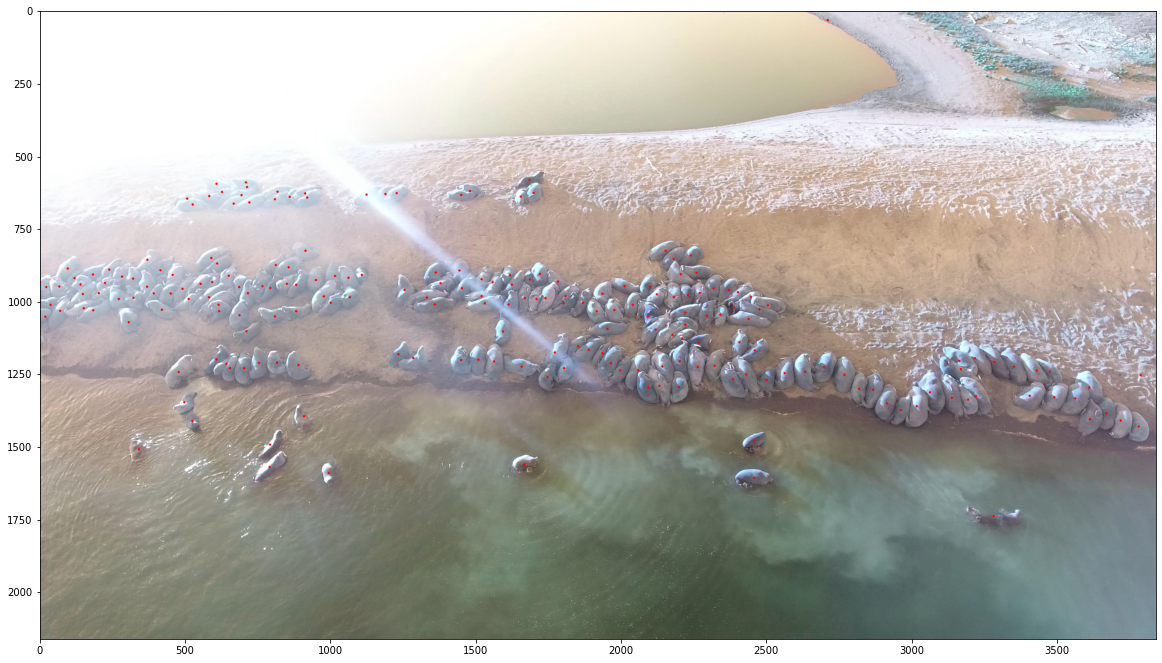

In [16]:
image = cv2.imread("./data/images/"+file+".jpg")
for i in box1.index:
    h,w,_=image.shape
    x=int(w*(box1[1].loc[i]))
    y=int(h*(box1[2].loc[i]))
    
    #cv2.rectangle(image, (int(w*box1[1].loc[i]),int(h*box1[2].loc[i])), \
    #                     (int(w*box1[1].loc[i]+w*box1[3].loc[i]),int(h*box1[2].loc[i]+h*box1[4].loc[i])), (255,0,0),2)
    image = cv2.circle(image, (x,y), 4, (255, 0, 0), -1)
    #print(x,y)
fig = plt.figure()
fig.set_size_inches(20,15)
plt.imshow(image, cmap='gray')
plt.show()

In [17]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [191, 194, 209],
        [190, 193, 208],
        [191, 194, 209]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [191, 194, 209],
        [191, 194, 209],
        [192, 195, 210]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [191, 194, 209],
        [190, 193, 208],
        [190, 193, 208]],

       ...,

       [[125, 124, 110],
        [126, 125, 111],
        [128, 127, 113],
        ...,
        [121, 147, 159],
        [120, 146, 158],
        [120, 146, 158]],

       [[122, 121, 107],
        [125, 124, 110],
        [128, 127, 113],
        ...,
        [122, 148, 160],
        [121, 147, 159],
        [121, 147, 159]],

       [[119, 118, 104],
        [123, 122, 108],
        [128, 127, 113],
        ...,
        [122, 148, 160],
        [122, 148, 160],
        [122, 148, 160]]